In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
loans = pd.read_csv('TrainAndValid.csv',parse_dates=["saledate"])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null datetime64[ns]
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state              

In [51]:
loans.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [52]:
loans.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
loans['UsageBand'] = pd.factorize(loans.UsageBand)[0]

In [54]:
loans.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,0,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,0,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,2,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
char_cols = loans.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    loans[c] = pd.factorize(loans[c])[0]

In [56]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   412698 non-null int64
saledate                    412698 non-null datetime64[ns]
fiModelDesc                 412698 non-null int64
fiBaseModel                 412698 non-null int64
fiSecondaryDesc             412698 non-null int64
fiModelSeries               412698 non-null int64
fiModelDescriptor           412698 non-null int64
ProductSize                 412698 non-null int64
fiProductClassDesc          412698 non-null int64
state                   

In [57]:
loans = pd.concat([
        loans.select_dtypes([], ['category']),
        loans.select_dtypes(['category']).apply(pd.Series.astype, dtype='category')
        ], axis=1).reindex_axis(loans.columns, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  after removing the cwd from sys.path.


In [58]:
loans.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,0,2006-11-16,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,0,2004-03-26,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,2004-02-26,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,2011-05-19,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,2,2009-07-23,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5,0,'SalePrice')

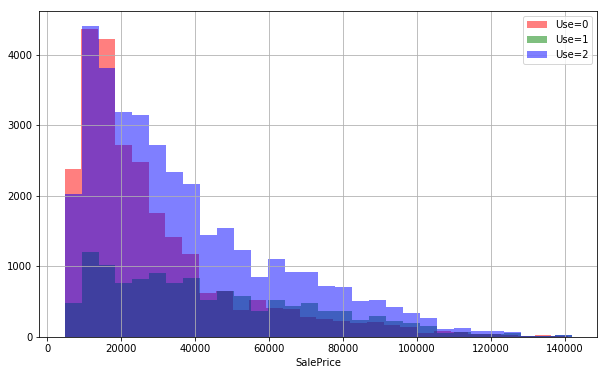

In [61]:
plt.figure(figsize=(10,6))
loans[loans['UsageBand']==0]['SalePrice'].hist(alpha=0.5,color='red',
                                              bins=30,label='Use=0')
loans[loans['UsageBand']==1]['SalePrice'].hist(alpha=0.5,color='green',
                                              bins=30,label='Use=1')
loans[loans['UsageBand']==2]['SalePrice'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Use=2')
plt.legend()
plt.xlabel('SalePrice')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5,0,'sales')

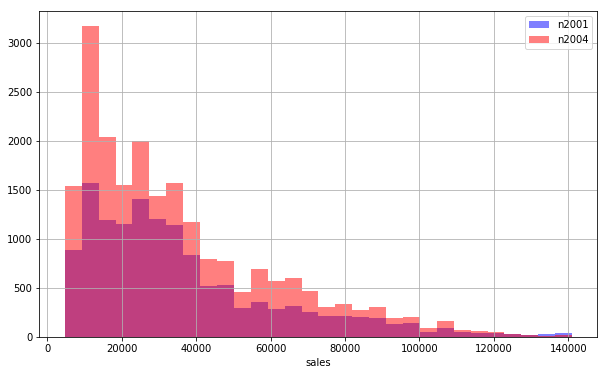

In [64]:
plt.figure(figsize=(10,6))
loans[loans['YearMade']==2001]['SalePrice'].hist(alpha=0.5,color='blue',
                                              bins=30,label='n2001')
loans[loans['YearMade']==2004]['SalePrice'].hist(alpha=0.5,color='red',
                                              bins=30,label='n2004')
plt.legend()
plt.xlabel('sales')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


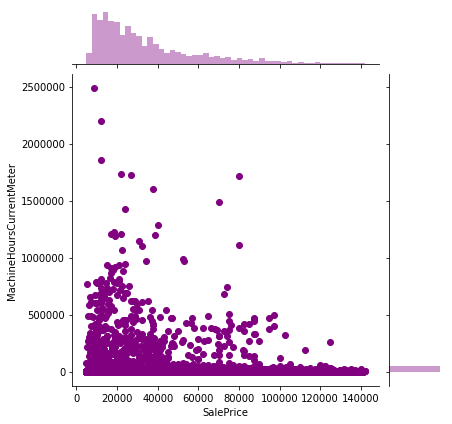

In [66]:
sns.jointplot(x='SalePrice',y='MachineHoursCurrentMeter',data=loans,color='purple')

In [68]:
pd.DataFrame(loans).fillna(0)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,0,2006-11-16,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,0,2004-03-26,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,2004-02-26,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,2011-05-19,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,2,2009-07-23,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,0,2008-12-18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,1,2004-08-26,...,0,0,0,0,0,-1,-1,-1,-1,-1
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,1,2005-11-17,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,0,2009-08-27,...,0,0,0,0,0,-1,-1,-1,-1,-1
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,2,2007-08-09,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0


In [69]:
loans.isnull().any()

SalesID                     False
SalePrice                   False
MachineID                   False
ModelID                     False
datasource                  False
auctioneerID                 True
YearMade                    False
MachineHoursCurrentMeter     True
UsageBand                   False
saledate                    False
fiModelDesc                 False
fiBaseModel                 False
fiSecondaryDesc             False
fiModelSeries               False
fiModelDescriptor           False
ProductSize                 False
fiProductClassDesc          False
state                       False
ProductGroup                False
ProductGroupDesc            False
Drive_System                False
Enclosure                   False
Forks                       False
Pad_Type                    False
Ride_Control                False
Stick                       False
Transmission                False
Turbocharged                False
Blade_Extension             False
Blade_Width   

In [80]:
df['Year']=[d.split('-')[0] for d in loans.date]

AttributeError: 'DataFrame' object has no attribute 'date'

In [27]:
final_data = loans

In [28]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   412698 non-null int64
saledate                    412698 non-null datetime64[ns]
fiModelDesc                 412698 non-null int64
fiBaseModel                 412698 non-null int64
fiSecondaryDesc             412698 non-null int64
fiModelSeries               412698 non-null int64
fiModelDescriptor           412698 non-null int64
ProductSize                 412698 non-null int64
fiProductClassDesc          412698 non-null int64
state                   

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = final_data.drop(['saledate','SalePrice','auctioneerID','MachineHoursCurrentMeter',],axis=1)
y = final_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [120]:
X.head()

,SalesID,MachineID,ModelID,datasource,YearMade,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,999089,3157,121,2004,0,0,0,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
1,1139248,117657,77,121,1996,0,1,1,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
2,1139249,434808,7009,121,2001,1,2,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1139251,1026470,332,121,2001,1,3,3,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1139253,1057373,17311,121,2007,2,4,4,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [121]:
pd.DataFrame(loans).fillna(0)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,0,2006-11-16,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,0,2004-03-26,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,1,2004-02-26,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,1,2011-05-19,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,2,2009-07-23,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,0,2008-12-18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,1,2004-08-26,...,0,0,0,0,0,-1,-1,-1,-1,-1
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,1,2005-11-17,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,0,2009-08-27,...,0,0,0,0,0,-1,-1,-1,-1,-1
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,2,2007-08-09,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0


In [31]:
from sklearn.ensemble import RandomForestRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [32]:
dtree = RandomForestRegressor()

In [33]:
dtree.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [37]:
dtree.score(X_train,y_train)

0.9642373762258959

In [34]:
predictions = dtree.predict(X_test)

In [41]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(X)-n_valid
raw_train, raw_valid = split_vals(X, n_trn)
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((400698, 49), (400698,), (12000, 49))

In [44]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [45]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 7.18 s
[4271.062506537552, 10089.29276264967, 0.9656217135631027, 0.8515642495500951]
